# 상권 분석 시스템

In [1]:
# 필요한 라이브러리 불러오기
from data_modeling import *
from data_preprocess import *
from data_visualization import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [2]:
# 데이터 불러오기 - 상권분석
total = pd.read_csv('data/모델링_데이터_최종.csv', encoding = 'cp949').drop('Unnamed: 0', axis = 1)

# 데이터 불러오기 - 상권정보 시각화
df_all = pd.read_csv('data/시각화_데이터_최종.csv', encoding = 'cp949').drop('Unnamed: 0', axis = 1)

# 데이터 불러오기 - 상권현황
df_base = pd.read_csv('data/상권정보_데이터_최종.csv', encoding = 'cp949').drop('Unnamed: 0', axis = 1)

## 1. 분석 대상 선택
### (1) 자치구 선택  
['중구', '종로구', '용산구', '금천구', '영등포구', '송파구', '강동구', '마포구', '강남구', '노원구', '서대문구', '광진구', '서초구', '구로구', '은평구', '성북구', '동작구', '동대문구', '관악구', '성동구', '강서구', '강북구', '도봉구', '중랑구', '양천구']

In [3]:
# 자치구 선택

location_name_select = '중구'

### (2) 상권 선택

In [4]:
# 선택 가능한 상권 출력

market_name = df_all[df_all['자치구_명'] == location_name_select]
market_code_list = list(market_name['상권_코드'].unique())
market_code_list

available_market_name = []
for code in market_code_list:
    select_market = df_base[df_base['상권_코드'] == code].reset_index(drop = True)
    available_market_name.append(select_market.at[0, '상권_코드_명'])
    
available_market_name

['동대문패션타운 관광특구',
 '명동 남대문 북창동 다동 무교동 관광특구',
 '서울 중구 신당역_2',
 '남대문시장',
 '동평화시장',
 '평화시장',
 '동대문시장_1',
 '제일평화시장',
 '동대문역사문화공원역',
 '명동거리',
 '롯데백화점',
 '서울 중구 을지로3가역_2',
 '서울 중구 충무로역_2',
 '북창동',
 '서울시청',
 '서울 중구 을지로3가역_1',
 '서울 중구 약수역_2',
 '방산종합시장',
 '서울 중구 충무로역_1',
 '시청역_1',
 '서울중앙시장',
 '서울 중구 신당역_1',
 '시청역_2',
 '신중부시장',
 '퇴계로12길',
 '서울 중구 명동역',
 '인현시장',
 '퇴계로56길',
 '동호로10길',
 '장충단로8길',
 '약수시장',
 '난계로11길',
 '퇴계로90길',
 '다산로39길',
 '청구로17길',
 '장충동 족발거리',
 '퇴계로8길',
 '백학시장',
 '동호로15길',
 '명동길',
 '다산로38길',
 '동호로20길',
 '퇴계로18길',
 '다산로33길',
 '다산로36길',
 '삼일대로4길',
 '동호로11길',
 '합동(새벽)시장',
 '퇴계로46길',
 '청평화시장',
 '동호로8길',
 '청구로1길',
 '난계로21길',
 '서울 중구 약수역_1']

In [5]:
# 상권 선택

market_name_select = '명동거리'

### (3) 서비스 업종 선택

In [6]:
# 선택 가능한 서비스 업종 출력

service_name = total[total['상권_코드_명'] == market_name_select].reset_index(drop = True)
service_name_list = list(service_name['서비스_업종_코드_명'].unique())
service_name_list

['일반의류',
 '한식음식점',
 '화장품',
 '슈퍼마켓',
 '신발',
 '분식전문점',
 '커피-음료',
 '가방',
 '일반의원',
 '피부관리실',
 '양식음식점',
 '시계및귀금속',
 '미용실',
 '일식음식점',
 '안경',
 '중식음식점',
 '호프-간이주점',
 '네일숍',
 '의약품',
 '운동/경기용품',
 '반찬가게',
 '치과의원',
 '여관',
 '서적',
 '문구',
 '패스트푸드점',
 '제과점',
 '편의점',
 '한의원',
 '당구장',
 '노래방',
 '화초',
 '치킨전문점',
 '청과상']

In [7]:
# 서비스 업종 선택

service_name_select = '편의점'

## 2. 상권 정보 시각화

In [8]:
market_code = df_base[df_base['상권_코드_명'] == market_name_select].reset_index(drop = True)
market_code = market_code.at[0, '상권_코드']
df = df_all[df_all['상권_코드'] == market_code]

### (1) 유동인구

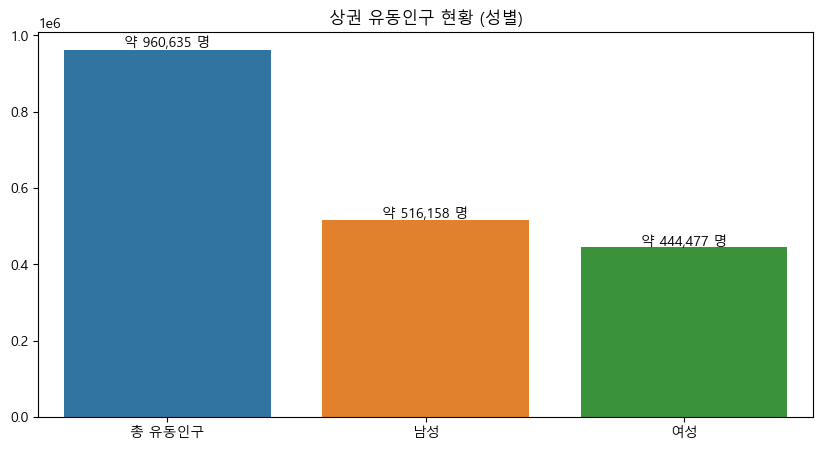

In [9]:
# 총 유동인구 현황

visual_fluid_total(df)

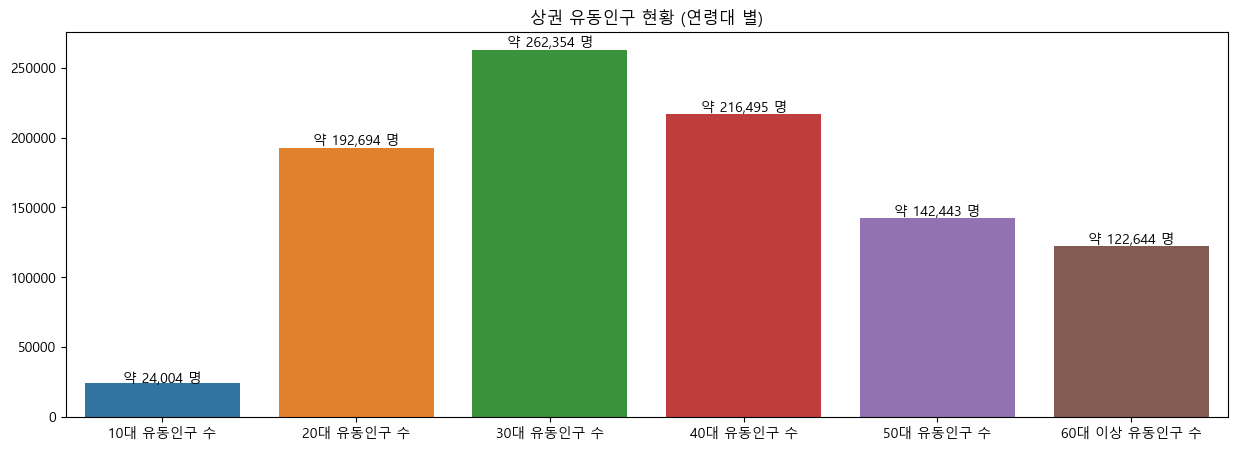

In [10]:
# 연령별 유동인구 현황

visual_fluid_age(df)

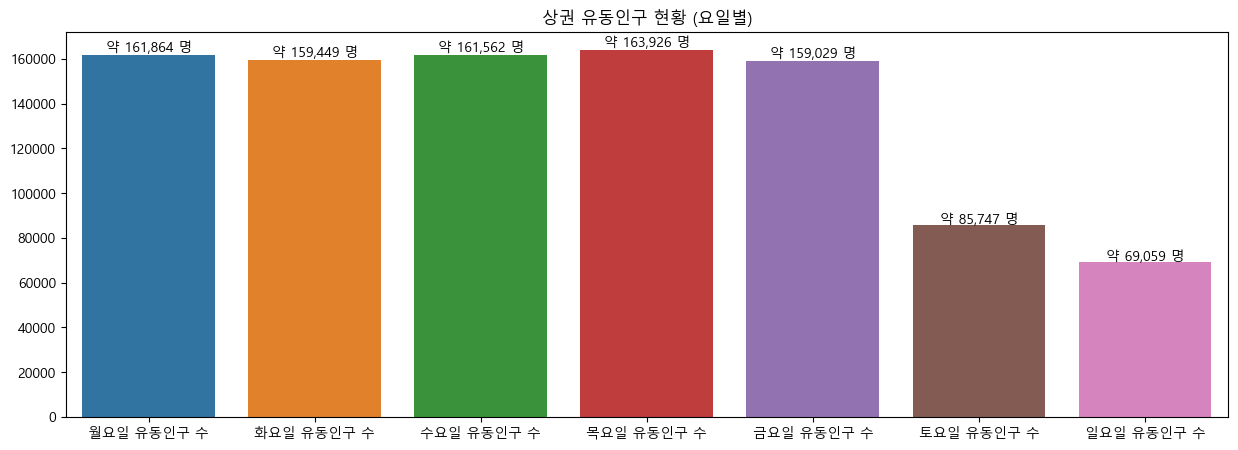

In [11]:
# 요일별 유동인구 현황

visual_fluid_day(df)

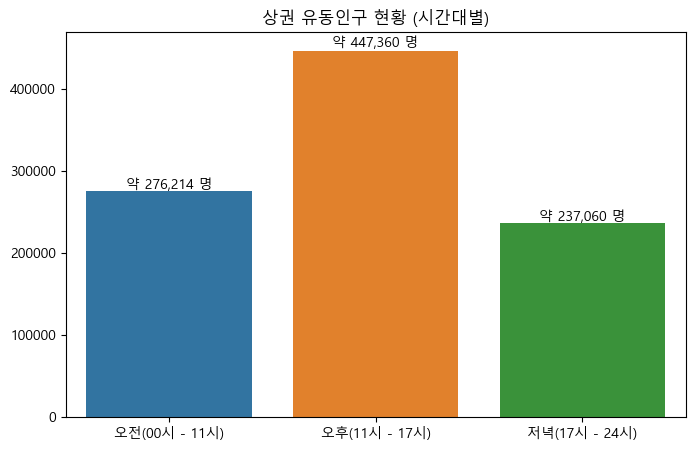

In [12]:
# 시간대별 유동인구 현황

visual_fluid_time(df)

### (2) 집객시설

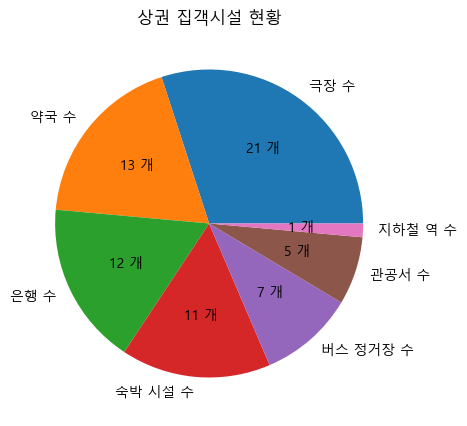

In [13]:
visual_facil(df)

### (3) 직장인구

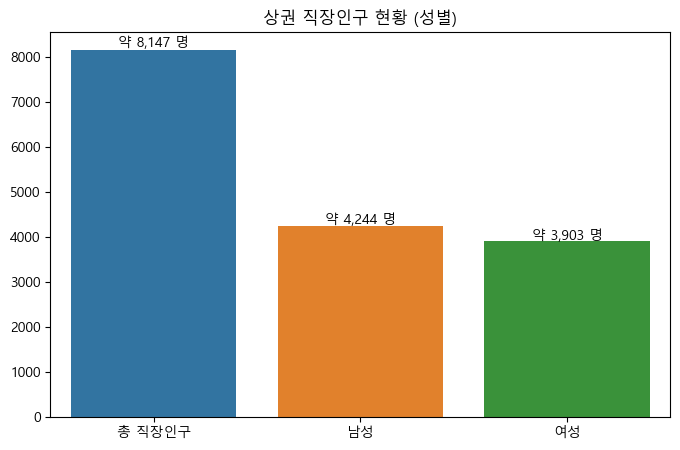

In [14]:
# 총 직장인구 현황

visual_work_total(df)

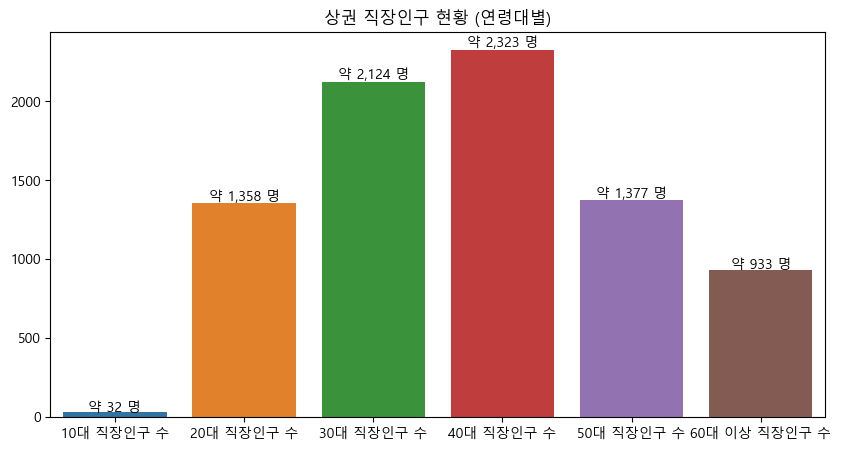

In [15]:
# 연령대별 직장인구 현황

visual_work_age(df)

### (4) 상주인구

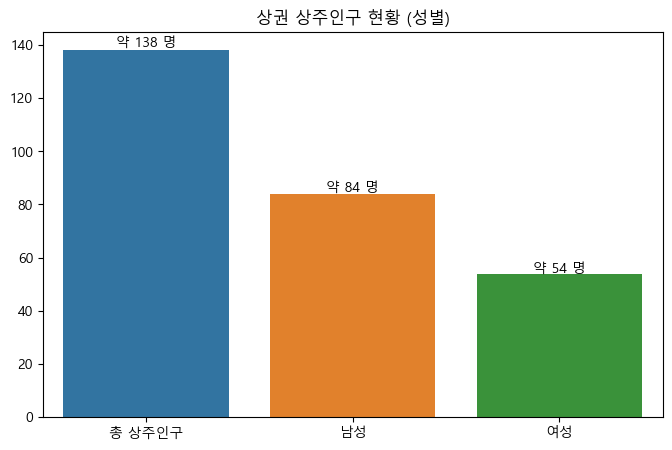

In [16]:
# 총 상주인구 현황
visual_live_total(df)

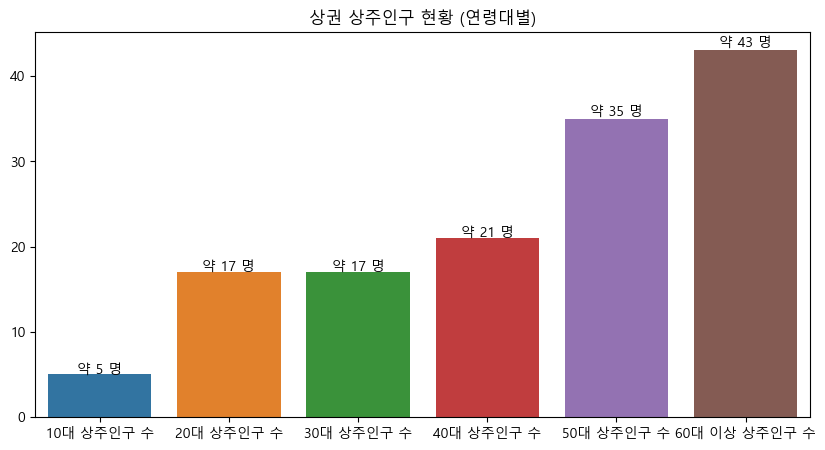

In [17]:
# 연령대별 상주인구 현황

visual_live_age(df)

## 2. 모델링
### (1) 폐업률

In [18]:
# 전처리

market_code = df_base[df_base['상권_코드_명'] == market_name_select].reset_index(drop = True)
market_code = market_code.at[0, '상권_코드']
service_code = total[total['서비스_업종_코드_명'] == service_name_select].reset_index(drop = True)
service_code = service_code.at[0, '서비스_업종_코드']

x_in, x_out, x_predict = data_preprocessing_fail(total, market_code, service_code)

In [19]:
# 모델링

model_fail = modeling(x_in.values, x_out)

[0]	validation_0-rmse:5.58674
[1]	validation_0-rmse:5.58353
[2]	validation_0-rmse:5.58111
[3]	validation_0-rmse:5.57835
[4]	validation_0-rmse:5.57586
[5]	validation_0-rmse:5.57351
[6]	validation_0-rmse:5.57082
[7]	validation_0-rmse:5.56774
[8]	validation_0-rmse:5.56416
[9]	validation_0-rmse:5.56132
[10]	validation_0-rmse:5.55858
[11]	validation_0-rmse:5.55517
[12]	validation_0-rmse:5.55211
[13]	validation_0-rmse:5.54937
[14]	validation_0-rmse:5.54655
[15]	validation_0-rmse:5.54406
[16]	validation_0-rmse:5.54062
[17]	validation_0-rmse:5.53792
[18]	validation_0-rmse:5.53556
[19]	validation_0-rmse:5.53299
[20]	validation_0-rmse:5.53019
[21]	validation_0-rmse:5.52726
[22]	validation_0-rmse:5.52456
[23]	validation_0-rmse:5.52239
[24]	validation_0-rmse:5.51969
[25]	validation_0-rmse:5.51700
[26]	validation_0-rmse:5.51382
[27]	validation_0-rmse:5.51040
[28]	validation_0-rmse:5.50771
[29]	validation_0-rmse:5.50625
[30]	validation_0-rmse:5.50425
[31]	validation_0-rmse:5.50085
[32]	validation_0-

[260]	validation_0-rmse:4.99359
[261]	validation_0-rmse:4.99141
[262]	validation_0-rmse:4.98956
[263]	validation_0-rmse:4.98748
[264]	validation_0-rmse:4.98533
[265]	validation_0-rmse:4.98410
[266]	validation_0-rmse:4.98232
[267]	validation_0-rmse:4.97983
[268]	validation_0-rmse:4.97817
[269]	validation_0-rmse:4.97704
[270]	validation_0-rmse:4.97582
[271]	validation_0-rmse:4.97415
[272]	validation_0-rmse:4.97294
[273]	validation_0-rmse:4.97102
[274]	validation_0-rmse:4.96930
[275]	validation_0-rmse:4.96852
[276]	validation_0-rmse:4.96639
[277]	validation_0-rmse:4.96476
[278]	validation_0-rmse:4.96273
[279]	validation_0-rmse:4.96182
[280]	validation_0-rmse:4.96006
[281]	validation_0-rmse:4.95903
[282]	validation_0-rmse:4.95739
[283]	validation_0-rmse:4.95566
[284]	validation_0-rmse:4.95476
[285]	validation_0-rmse:4.95306
[286]	validation_0-rmse:4.95187
[287]	validation_0-rmse:4.95087
[288]	validation_0-rmse:4.94886
[289]	validation_0-rmse:4.94620
[290]	validation_0-rmse:4.94350
[291]	va

[517]	validation_0-rmse:4.62961
[518]	validation_0-rmse:4.62828
[519]	validation_0-rmse:4.62730
[520]	validation_0-rmse:4.62600
[521]	validation_0-rmse:4.62467
[522]	validation_0-rmse:4.62404
[523]	validation_0-rmse:4.62297
[524]	validation_0-rmse:4.62166
[525]	validation_0-rmse:4.62047
[526]	validation_0-rmse:4.61907
[527]	validation_0-rmse:4.61795
[528]	validation_0-rmse:4.61666
[529]	validation_0-rmse:4.61429
[530]	validation_0-rmse:4.61303
[531]	validation_0-rmse:4.61172
[532]	validation_0-rmse:4.61063
[533]	validation_0-rmse:4.60886
[534]	validation_0-rmse:4.60773
[535]	validation_0-rmse:4.60675
[536]	validation_0-rmse:4.60552
[537]	validation_0-rmse:4.60422
[538]	validation_0-rmse:4.60474
[539]	validation_0-rmse:4.60394
[540]	validation_0-rmse:4.60262
[541]	validation_0-rmse:4.60134
[542]	validation_0-rmse:4.60010
[543]	validation_0-rmse:4.59864
[544]	validation_0-rmse:4.59756
[545]	validation_0-rmse:4.59633
[546]	validation_0-rmse:4.59513
[547]	validation_0-rmse:4.59386
[548]	va

[774]	validation_0-rmse:4.35595
[775]	validation_0-rmse:4.35498
[776]	validation_0-rmse:4.35399
[777]	validation_0-rmse:4.35307
[778]	validation_0-rmse:4.35209
[779]	validation_0-rmse:4.35142
[780]	validation_0-rmse:4.35042
[781]	validation_0-rmse:4.34994
[782]	validation_0-rmse:4.34897
[783]	validation_0-rmse:4.34797
[784]	validation_0-rmse:4.34717
[785]	validation_0-rmse:4.34607
[786]	validation_0-rmse:4.34568
[787]	validation_0-rmse:4.34490
[788]	validation_0-rmse:4.34397
[789]	validation_0-rmse:4.34204
[790]	validation_0-rmse:4.34114
[791]	validation_0-rmse:4.34040
[792]	validation_0-rmse:4.33948
[793]	validation_0-rmse:4.33833
[794]	validation_0-rmse:4.33767
[795]	validation_0-rmse:4.33702
[796]	validation_0-rmse:4.33601
[797]	validation_0-rmse:4.33506
[798]	validation_0-rmse:4.33448
[799]	validation_0-rmse:4.33332
[800]	validation_0-rmse:4.33249
[801]	validation_0-rmse:4.33297
[802]	validation_0-rmse:4.33207
[803]	validation_0-rmse:4.33123
[804]	validation_0-rmse:4.33034
[805]	va

[1030]	validation_0-rmse:4.16967
[1031]	validation_0-rmse:4.16894
[1032]	validation_0-rmse:4.16782
[1033]	validation_0-rmse:4.16671
[1034]	validation_0-rmse:4.16725
[1035]	validation_0-rmse:4.16674
[1036]	validation_0-rmse:4.16605
[1037]	validation_0-rmse:4.16539
[1038]	validation_0-rmse:4.16487
[1039]	validation_0-rmse:4.16425
[1040]	validation_0-rmse:4.16384
[1041]	validation_0-rmse:4.16413
[1042]	validation_0-rmse:4.16351
[1043]	validation_0-rmse:4.16295
[1044]	validation_0-rmse:4.16270
[1045]	validation_0-rmse:4.16204
[1046]	validation_0-rmse:4.16152
[1047]	validation_0-rmse:4.16120
[1048]	validation_0-rmse:4.16052
[1049]	validation_0-rmse:4.16037
[1050]	validation_0-rmse:4.16013
[1051]	validation_0-rmse:4.15955
[1052]	validation_0-rmse:4.15892
[1053]	validation_0-rmse:4.15811
[1054]	validation_0-rmse:4.15745
[1055]	validation_0-rmse:4.15696
[1056]	validation_0-rmse:4.15643
[1057]	validation_0-rmse:4.15581
[1058]	validation_0-rmse:4.15518
[1059]	validation_0-rmse:4.15494
[1060]	val

[1279]	validation_0-rmse:4.04702
[1280]	validation_0-rmse:4.04692
[1281]	validation_0-rmse:4.04647
[1282]	validation_0-rmse:4.04641
[1283]	validation_0-rmse:4.04593
[1284]	validation_0-rmse:4.04529
[1285]	validation_0-rmse:4.04494
[1286]	validation_0-rmse:4.04468
[1287]	validation_0-rmse:4.04450
[1288]	validation_0-rmse:4.04395
[1289]	validation_0-rmse:4.04347
[1290]	validation_0-rmse:4.04261
[1291]	validation_0-rmse:4.04208
[1292]	validation_0-rmse:4.04189
[1293]	validation_0-rmse:4.04105
[1294]	validation_0-rmse:4.04074
[1295]	validation_0-rmse:4.04055
[1296]	validation_0-rmse:4.03956
[1297]	validation_0-rmse:4.03944
[1298]	validation_0-rmse:4.03921
[1299]	validation_0-rmse:4.03857
[1300]	validation_0-rmse:4.03809
[1301]	validation_0-rmse:4.03795
[1302]	validation_0-rmse:4.03706
[1303]	validation_0-rmse:4.03699
[1304]	validation_0-rmse:4.03696
[1305]	validation_0-rmse:4.03655
[1306]	validation_0-rmse:4.03633
[1307]	validation_0-rmse:4.03675
[1308]	validation_0-rmse:4.03623
[1309]	val

[1528]	validation_0-rmse:3.97083
[1529]	validation_0-rmse:3.97052
[1530]	validation_0-rmse:3.97027
[1531]	validation_0-rmse:3.97006
[1532]	validation_0-rmse:3.96978
[1533]	validation_0-rmse:3.96952
[1534]	validation_0-rmse:3.96894
[1535]	validation_0-rmse:3.96883
[1536]	validation_0-rmse:3.96877
[1537]	validation_0-rmse:3.96843
[1538]	validation_0-rmse:3.96791
[1539]	validation_0-rmse:3.96790
[1540]	validation_0-rmse:3.96787
[1541]	validation_0-rmse:3.96759
[1542]	validation_0-rmse:3.96725
[1543]	validation_0-rmse:3.96711
[1544]	validation_0-rmse:3.96710
[1545]	validation_0-rmse:3.96630
[1546]	validation_0-rmse:3.96603
[1547]	validation_0-rmse:3.96585
[1548]	validation_0-rmse:3.96630
[1549]	validation_0-rmse:3.96626
[1550]	validation_0-rmse:3.96519
[1551]	validation_0-rmse:3.96520
[1552]	validation_0-rmse:3.96450
[1553]	validation_0-rmse:3.96462
[1554]	validation_0-rmse:3.96434
[1555]	validation_0-rmse:3.96327
[1556]	validation_0-rmse:3.96304
[1557]	validation_0-rmse:3.96271
[1558]	val

[1777]	validation_0-rmse:3.91332
[1778]	validation_0-rmse:3.91287
[1779]	validation_0-rmse:3.91263
[1780]	validation_0-rmse:3.91238
[1781]	validation_0-rmse:3.91229
[1782]	validation_0-rmse:3.91211
[1783]	validation_0-rmse:3.91202
[1784]	validation_0-rmse:3.91215
[1785]	validation_0-rmse:3.91200
[1786]	validation_0-rmse:3.91194
[1787]	validation_0-rmse:3.91191
[1788]	validation_0-rmse:3.91227
[1789]	validation_0-rmse:3.91263
[1790]	validation_0-rmse:3.91224
[1791]	validation_0-rmse:3.91210
[1792]	validation_0-rmse:3.91186
[1793]	validation_0-rmse:3.91160
[1794]	validation_0-rmse:3.91144
[1795]	validation_0-rmse:3.91084
[1796]	validation_0-rmse:3.91059
[1797]	validation_0-rmse:3.91046
[1798]	validation_0-rmse:3.91026
[1799]	validation_0-rmse:3.90981
[1800]	validation_0-rmse:3.90951
[1801]	validation_0-rmse:3.90928
[1802]	validation_0-rmse:3.90915
[1803]	validation_0-rmse:3.90871
[1804]	validation_0-rmse:3.90833
[1805]	validation_0-rmse:3.90861
[1806]	validation_0-rmse:3.90825
[1807]	val

[2026]	validation_0-rmse:3.88384
[2027]	validation_0-rmse:3.88388
[2028]	validation_0-rmse:3.88379
[2029]	validation_0-rmse:3.88418
[2030]	validation_0-rmse:3.88445
[2031]	validation_0-rmse:3.88448
[2032]	validation_0-rmse:3.88421
[2033]	validation_0-rmse:3.88392
[2034]	validation_0-rmse:3.88377
[2035]	validation_0-rmse:3.88327
[2036]	validation_0-rmse:3.88287
[2037]	validation_0-rmse:3.88322
[2038]	validation_0-rmse:3.88311
[2039]	validation_0-rmse:3.88314
[2040]	validation_0-rmse:3.88333
[2041]	validation_0-rmse:3.88337
[2042]	validation_0-rmse:3.88315
[2043]	validation_0-rmse:3.88287
[2044]	validation_0-rmse:3.88245
[2045]	validation_0-rmse:3.88228
[2046]	validation_0-rmse:3.88256
[2047]	validation_0-rmse:3.88260
[2048]	validation_0-rmse:3.88256
[2049]	validation_0-rmse:3.88221
[2050]	validation_0-rmse:3.88224
[2051]	validation_0-rmse:3.88226
[2052]	validation_0-rmse:3.88227
[2053]	validation_0-rmse:3.88214
[2054]	validation_0-rmse:3.88217
[2055]	validation_0-rmse:3.88194
[2056]	val

[2275]	validation_0-rmse:3.86450
[2276]	validation_0-rmse:3.86455
[2277]	validation_0-rmse:3.86429
[2278]	validation_0-rmse:3.86406
[2279]	validation_0-rmse:3.86369
[2280]	validation_0-rmse:3.86400
[2281]	validation_0-rmse:3.86375
[2282]	validation_0-rmse:3.86326
[2283]	validation_0-rmse:3.86343
[2284]	validation_0-rmse:3.86310
[2285]	validation_0-rmse:3.86315
[2286]	validation_0-rmse:3.86319
[2287]	validation_0-rmse:3.86270
[2288]	validation_0-rmse:3.86246
[2289]	validation_0-rmse:3.86220
[2290]	validation_0-rmse:3.86192
[2291]	validation_0-rmse:3.86143
[2292]	validation_0-rmse:3.86154
[2293]	validation_0-rmse:3.86128
[2294]	validation_0-rmse:3.86080
[2295]	validation_0-rmse:3.86071
[2296]	validation_0-rmse:3.86050
[2297]	validation_0-rmse:3.86060
[2298]	validation_0-rmse:3.86084
[2299]	validation_0-rmse:3.86054
[2300]	validation_0-rmse:3.86046
[2301]	validation_0-rmse:3.86051
[2302]	validation_0-rmse:3.86039
[2303]	validation_0-rmse:3.86054
[2304]	validation_0-rmse:3.86013
[2305]	val

[2524]	validation_0-rmse:3.84343
[2525]	validation_0-rmse:3.84368
[2526]	validation_0-rmse:3.84336
[2527]	validation_0-rmse:3.84336
[2528]	validation_0-rmse:3.84335
[2529]	validation_0-rmse:3.84309
[2530]	validation_0-rmse:3.84303
[2531]	validation_0-rmse:3.84303
[2532]	validation_0-rmse:3.84262
[2533]	validation_0-rmse:3.84279
[2534]	validation_0-rmse:3.84275
[2535]	validation_0-rmse:3.84272
[2536]	validation_0-rmse:3.84249
[2537]	validation_0-rmse:3.84213
[2538]	validation_0-rmse:3.84173
[2539]	validation_0-rmse:3.84170
[2540]	validation_0-rmse:3.84174
[2541]	validation_0-rmse:3.84199
[2542]	validation_0-rmse:3.84190
[2543]	validation_0-rmse:3.84172
[2544]	validation_0-rmse:3.84169
[2545]	validation_0-rmse:3.84160
[2546]	validation_0-rmse:3.84156
[2547]	validation_0-rmse:3.84131
[2548]	validation_0-rmse:3.84108
[2549]	validation_0-rmse:3.84058
[2550]	validation_0-rmse:3.84027
[2551]	validation_0-rmse:3.83989
[2552]	validation_0-rmse:3.83963
[2553]	validation_0-rmse:3.83960
[2554]	val

[2773]	validation_0-rmse:3.82479
[2774]	validation_0-rmse:3.82480
[2775]	validation_0-rmse:3.82446
[2776]	validation_0-rmse:3.82462
[2777]	validation_0-rmse:3.82461
[2778]	validation_0-rmse:3.82455
[2779]	validation_0-rmse:3.82425
[2780]	validation_0-rmse:3.82426
[2781]	validation_0-rmse:3.82434
[2782]	validation_0-rmse:3.82417
[2783]	validation_0-rmse:3.82425
[2784]	validation_0-rmse:3.82382
[2785]	validation_0-rmse:3.82391
[2786]	validation_0-rmse:3.82394
[2787]	validation_0-rmse:3.82395
[2788]	validation_0-rmse:3.82393
[2789]	validation_0-rmse:3.82388
[2790]	validation_0-rmse:3.82375
[2791]	validation_0-rmse:3.82370
[2792]	validation_0-rmse:3.82370
[2793]	validation_0-rmse:3.82367
[2794]	validation_0-rmse:3.82364
[2795]	validation_0-rmse:3.82352
[2796]	validation_0-rmse:3.82341
[2797]	validation_0-rmse:3.82342
[2798]	validation_0-rmse:3.82329
[2799]	validation_0-rmse:3.82333
[2800]	validation_0-rmse:3.82331
[2801]	validation_0-rmse:3.82328
[2802]	validation_0-rmse:3.82356
[2803]	val

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



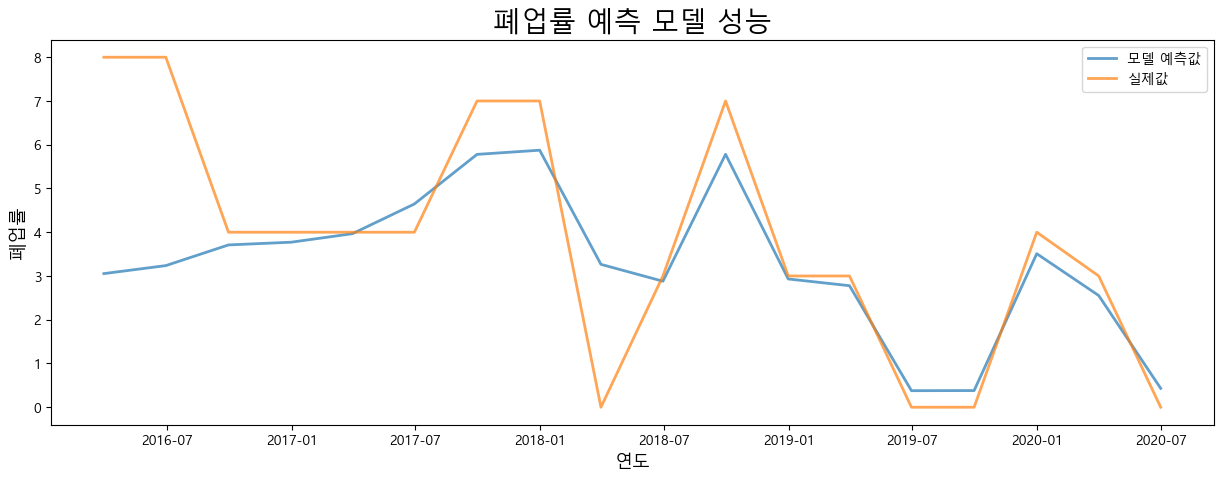

In [20]:
visual_model(model_fail, x_in.values, x_out)

In [21]:
# 2020-3 분기 폐업률 예측
predict = model_fail.predict(x_predict)
print("2020-3 '{}' 상권의 '{}' 업종 예상 폐업률은 {:3.2f}% 입니다.".format(market_name_select, service_name_select, predict[0]))

2020-3 '명동거리' 상권의 '편의점' 업종 예상 폐업률은 1.19% 입니다.


### (2) 창업 전략 분석

In [22]:
# 전처리

x_in_1, x_out_1, x_predict_1 = data_preprocessing_survive(total, market_code, service_code, 'gender')
x_in_2, x_out_2, x_predict_2 = data_preprocessing_survive(total, market_code, service_code, 'age')
x_in_3, x_out_3, x_predict_3 = data_preprocessing_survive(total, market_code, service_code, 'day')
x_in_4, x_out_4, x_predict_4 = data_preprocessing_survive(total, market_code, service_code, 'time')

In [23]:
# 모델링

# 모델링

model_survive_1 = modeling(x_in_1, x_out_1)
model_survive_2 = modeling(x_in_2, x_out_2)
model_survive_3 = modeling(x_in_3, x_out_3)
model_survive_4 = modeling(x_in_4, x_out_4)

[0]	validation_0-rmse:95.71242
[1]	validation_0-rmse:95.62467
[2]	validation_0-rmse:95.53578
[3]	validation_0-rmse:95.44773
[4]	validation_0-rmse:95.35969
[5]	validation_0-rmse:95.27389
[6]	validation_0-rmse:95.18624
[7]	validation_0-rmse:95.09764
[8]	validation_0-rmse:95.01031
[9]	validation_0-rmse:94.92393
[10]	validation_0-rmse:94.83611
[11]	validation_0-rmse:94.75021
[12]	validation_0-rmse:94.66235
[13]	validation_0-rmse:94.57661
[14]	validation_0-rmse:94.48870
[15]	validation_0-rmse:94.40027
[16]	validation_0-rmse:94.31694
[17]	validation_0-rmse:94.23282
[18]	validation_0-rmse:94.14672
[19]	validation_0-rmse:94.06071
[20]	validation_0-rmse:93.97480
[21]	validation_0-rmse:93.88746
[22]	validation_0-rmse:93.80243
[23]	validation_0-rmse:93.71591
[24]	validation_0-rmse:93.62948
[25]	validation_0-rmse:93.54370
[26]	validation_0-rmse:93.45670
[27]	validation_0-rmse:93.37072
[28]	validation_0-rmse:93.28726
[29]	validation_0-rmse:93.20101
[30]	validation_0-rmse:93.11456
[31]	validation_0-

[252]	validation_0-rmse:75.99940
[253]	validation_0-rmse:75.93072
[254]	validation_0-rmse:75.86054
[255]	validation_0-rmse:75.79063
[256]	validation_0-rmse:75.72158
[257]	validation_0-rmse:75.65352
[258]	validation_0-rmse:75.58478
[259]	validation_0-rmse:75.51517
[260]	validation_0-rmse:75.44619
[261]	validation_0-rmse:75.37655
[262]	validation_0-rmse:75.30763
[263]	validation_0-rmse:75.23805
[264]	validation_0-rmse:75.16866
[265]	validation_0-rmse:75.09925
[266]	validation_0-rmse:75.02980
[267]	validation_0-rmse:74.96096
[268]	validation_0-rmse:74.89228
[269]	validation_0-rmse:74.82364
[270]	validation_0-rmse:74.75444
[271]	validation_0-rmse:74.68509
[272]	validation_0-rmse:74.61759
[273]	validation_0-rmse:74.54999
[274]	validation_0-rmse:74.48047
[275]	validation_0-rmse:74.41185
[276]	validation_0-rmse:74.34464
[277]	validation_0-rmse:74.27613
[278]	validation_0-rmse:74.20830
[279]	validation_0-rmse:74.13940
[280]	validation_0-rmse:74.07187
[281]	validation_0-rmse:74.00522
[282]	vali

[501]	validation_0-rmse:60.52881
[502]	validation_0-rmse:60.47388
[503]	validation_0-rmse:60.41779
[504]	validation_0-rmse:60.36316
[505]	validation_0-rmse:60.30939
[506]	validation_0-rmse:60.25325
[507]	validation_0-rmse:60.19771
[508]	validation_0-rmse:60.14278
[509]	validation_0-rmse:60.08782
[510]	validation_0-rmse:60.03261
[511]	validation_0-rmse:59.97781
[512]	validation_0-rmse:59.92306
[513]	validation_0-rmse:59.86755
[514]	validation_0-rmse:59.81331
[515]	validation_0-rmse:59.75875
[516]	validation_0-rmse:59.70316
[517]	validation_0-rmse:59.64832
[518]	validation_0-rmse:59.59281
[519]	validation_0-rmse:59.53938
[520]	validation_0-rmse:59.48503
[521]	validation_0-rmse:59.43143
[522]	validation_0-rmse:59.37673
[523]	validation_0-rmse:59.32210
[524]	validation_0-rmse:59.26783
[525]	validation_0-rmse:59.21442
[526]	validation_0-rmse:59.15978
[527]	validation_0-rmse:59.10693
[528]	validation_0-rmse:59.05323
[529]	validation_0-rmse:58.99944
[530]	validation_0-rmse:58.94536
[531]	vali

[750]	validation_0-rmse:48.25665
[751]	validation_0-rmse:48.21185
[752]	validation_0-rmse:48.16734
[753]	validation_0-rmse:48.12451
[754]	validation_0-rmse:48.08081
[755]	validation_0-rmse:48.03760
[756]	validation_0-rmse:47.99343
[757]	validation_0-rmse:47.94913
[758]	validation_0-rmse:47.90581
[759]	validation_0-rmse:47.86189
[760]	validation_0-rmse:47.81745
[761]	validation_0-rmse:47.77401
[762]	validation_0-rmse:47.73194
[763]	validation_0-rmse:47.68795
[764]	validation_0-rmse:47.64546
[765]	validation_0-rmse:47.60142
[766]	validation_0-rmse:47.55827
[767]	validation_0-rmse:47.51438
[768]	validation_0-rmse:47.47100
[769]	validation_0-rmse:47.42837
[770]	validation_0-rmse:47.38611
[771]	validation_0-rmse:47.34265
[772]	validation_0-rmse:47.29919
[773]	validation_0-rmse:47.25730
[774]	validation_0-rmse:47.21409
[775]	validation_0-rmse:47.17154
[776]	validation_0-rmse:47.12930
[777]	validation_0-rmse:47.08628
[778]	validation_0-rmse:47.04418
[779]	validation_0-rmse:47.00185
[780]	vali

[999]	validation_0-rmse:38.51132
[1000]	validation_0-rmse:38.47665
[1001]	validation_0-rmse:38.44179
[1002]	validation_0-rmse:38.40720
[1003]	validation_0-rmse:38.37232
[1004]	validation_0-rmse:38.33938
[1005]	validation_0-rmse:38.30426
[1006]	validation_0-rmse:38.26932
[1007]	validation_0-rmse:38.23651
[1008]	validation_0-rmse:38.20203
[1009]	validation_0-rmse:38.16675
[1010]	validation_0-rmse:38.13133
[1011]	validation_0-rmse:38.09844
[1012]	validation_0-rmse:38.06417
[1013]	validation_0-rmse:38.02993
[1014]	validation_0-rmse:37.99555
[1015]	validation_0-rmse:37.96075
[1016]	validation_0-rmse:37.92592
[1017]	validation_0-rmse:37.89271
[1018]	validation_0-rmse:37.85869
[1019]	validation_0-rmse:37.82441
[1020]	validation_0-rmse:37.79037
[1021]	validation_0-rmse:37.75587
[1022]	validation_0-rmse:37.72162
[1023]	validation_0-rmse:37.68794
[1024]	validation_0-rmse:37.65370
[1025]	validation_0-rmse:37.61919
[1026]	validation_0-rmse:37.58536
[1027]	validation_0-rmse:37.55222
[1028]	validati

[1240]	validation_0-rmse:31.02001
[1241]	validation_0-rmse:30.99255
[1242]	validation_0-rmse:30.96445
[1243]	validation_0-rmse:30.93618
[1244]	validation_0-rmse:30.90908
[1245]	validation_0-rmse:30.88245
[1246]	validation_0-rmse:30.85418
[1247]	validation_0-rmse:30.82641
[1248]	validation_0-rmse:30.79916
[1249]	validation_0-rmse:30.77263
[1250]	validation_0-rmse:30.74542
[1251]	validation_0-rmse:30.71820
[1252]	validation_0-rmse:30.69113
[1253]	validation_0-rmse:30.66434
[1254]	validation_0-rmse:30.63713
[1255]	validation_0-rmse:30.60992
[1256]	validation_0-rmse:30.58221
[1257]	validation_0-rmse:30.55498
[1258]	validation_0-rmse:30.52814
[1259]	validation_0-rmse:30.50059
[1260]	validation_0-rmse:30.47321
[1261]	validation_0-rmse:30.44555
[1262]	validation_0-rmse:30.41989
[1263]	validation_0-rmse:30.39311
[1264]	validation_0-rmse:30.36772
[1265]	validation_0-rmse:30.34073
[1266]	validation_0-rmse:30.31319
[1267]	validation_0-rmse:30.28716
[1268]	validation_0-rmse:30.26026
[1269]	validat

[1481]	validation_0-rmse:25.05227
[1482]	validation_0-rmse:25.03012
[1483]	validation_0-rmse:25.00778
[1484]	validation_0-rmse:24.98539
[1485]	validation_0-rmse:24.96330
[1486]	validation_0-rmse:24.94124
[1487]	validation_0-rmse:24.91984
[1488]	validation_0-rmse:24.89795
[1489]	validation_0-rmse:24.87623
[1490]	validation_0-rmse:24.85422
[1491]	validation_0-rmse:24.83267
[1492]	validation_0-rmse:24.81130
[1493]	validation_0-rmse:24.78963
[1494]	validation_0-rmse:24.76735
[1495]	validation_0-rmse:24.74540
[1496]	validation_0-rmse:24.72317
[1497]	validation_0-rmse:24.70106
[1498]	validation_0-rmse:24.67898
[1499]	validation_0-rmse:24.65663
[1500]	validation_0-rmse:24.63512
[1501]	validation_0-rmse:24.61443
[1502]	validation_0-rmse:24.59276
[1503]	validation_0-rmse:24.57184
[1504]	validation_0-rmse:24.55054
[1505]	validation_0-rmse:24.52955
[1506]	validation_0-rmse:24.50960
[1507]	validation_0-rmse:24.48812
[1508]	validation_0-rmse:24.46658
[1509]	validation_0-rmse:24.44486
[1510]	validat

[1722]	validation_0-rmse:20.28941
[1723]	validation_0-rmse:20.27136
[1724]	validation_0-rmse:20.25356
[1725]	validation_0-rmse:20.23624
[1726]	validation_0-rmse:20.21845
[1727]	validation_0-rmse:20.20065
[1728]	validation_0-rmse:20.18307
[1729]	validation_0-rmse:20.16498
[1730]	validation_0-rmse:20.14788
[1731]	validation_0-rmse:20.13061
[1732]	validation_0-rmse:20.11295
[1733]	validation_0-rmse:20.09583
[1734]	validation_0-rmse:20.07835
[1735]	validation_0-rmse:20.06133
[1736]	validation_0-rmse:20.04388
[1737]	validation_0-rmse:20.02672
[1738]	validation_0-rmse:20.00983
[1739]	validation_0-rmse:19.99219
[1740]	validation_0-rmse:19.97511
[1741]	validation_0-rmse:19.95742
[1742]	validation_0-rmse:19.93968
[1743]	validation_0-rmse:19.92328
[1744]	validation_0-rmse:19.90627
[1745]	validation_0-rmse:19.88920
[1746]	validation_0-rmse:19.87245
[1747]	validation_0-rmse:19.85511
[1748]	validation_0-rmse:19.83830
[1749]	validation_0-rmse:19.82069
[1750]	validation_0-rmse:19.80408
[1751]	validat

[1963]	validation_0-rmse:16.52184
[1964]	validation_0-rmse:16.50797
[1965]	validation_0-rmse:16.49421
[1966]	validation_0-rmse:16.48017
[1967]	validation_0-rmse:16.46627
[1968]	validation_0-rmse:16.45219
[1969]	validation_0-rmse:16.43884
[1970]	validation_0-rmse:16.42478
[1971]	validation_0-rmse:16.41118
[1972]	validation_0-rmse:16.39740
[1973]	validation_0-rmse:16.38310
[1974]	validation_0-rmse:16.36902
[1975]	validation_0-rmse:16.35540
[1976]	validation_0-rmse:16.34219
[1977]	validation_0-rmse:16.32795
[1978]	validation_0-rmse:16.31385
[1979]	validation_0-rmse:16.29971
[1980]	validation_0-rmse:16.28608
[1981]	validation_0-rmse:16.27196
[1982]	validation_0-rmse:16.25842
[1983]	validation_0-rmse:16.24447
[1984]	validation_0-rmse:16.23060
[1985]	validation_0-rmse:16.21698
[1986]	validation_0-rmse:16.20358
[1987]	validation_0-rmse:16.19031
[1988]	validation_0-rmse:16.17637
[1989]	validation_0-rmse:16.16250
[1990]	validation_0-rmse:16.14902
[1991]	validation_0-rmse:16.13605
[1992]	validat

[2204]	validation_0-rmse:13.54901
[2205]	validation_0-rmse:13.53775
[2206]	validation_0-rmse:13.52706
[2207]	validation_0-rmse:13.51589
[2208]	validation_0-rmse:13.50477
[2209]	validation_0-rmse:13.49322
[2210]	validation_0-rmse:13.48190
[2211]	validation_0-rmse:13.47109
[2212]	validation_0-rmse:13.46029
[2213]	validation_0-rmse:13.44963
[2214]	validation_0-rmse:13.43828
[2215]	validation_0-rmse:13.42704
[2216]	validation_0-rmse:13.41645
[2217]	validation_0-rmse:13.40539
[2218]	validation_0-rmse:13.39496
[2219]	validation_0-rmse:13.38404
[2220]	validation_0-rmse:13.37301
[2221]	validation_0-rmse:13.36277
[2222]	validation_0-rmse:13.35189
[2223]	validation_0-rmse:13.34129
[2224]	validation_0-rmse:13.32970
[2225]	validation_0-rmse:13.31931
[2226]	validation_0-rmse:13.30824
[2227]	validation_0-rmse:13.29741
[2228]	validation_0-rmse:13.28637
[2229]	validation_0-rmse:13.27526
[2230]	validation_0-rmse:13.26538
[2231]	validation_0-rmse:13.25459
[2232]	validation_0-rmse:13.24464
[2233]	validat

[2445]	validation_0-rmse:11.21856
[2446]	validation_0-rmse:11.21005
[2447]	validation_0-rmse:11.20183
[2448]	validation_0-rmse:11.19363
[2449]	validation_0-rmse:11.18491
[2450]	validation_0-rmse:11.17628
[2451]	validation_0-rmse:11.16819
[2452]	validation_0-rmse:11.15993
[2453]	validation_0-rmse:11.15128
[2454]	validation_0-rmse:11.14291
[2455]	validation_0-rmse:11.13461
[2456]	validation_0-rmse:11.12641
[2457]	validation_0-rmse:11.11759
[2458]	validation_0-rmse:11.10932
[2459]	validation_0-rmse:11.10063
[2460]	validation_0-rmse:11.09191
[2461]	validation_0-rmse:11.08305
[2462]	validation_0-rmse:11.07460
[2463]	validation_0-rmse:11.06611
[2464]	validation_0-rmse:11.05751
[2465]	validation_0-rmse:11.04930
[2466]	validation_0-rmse:11.04087
[2467]	validation_0-rmse:11.03225
[2468]	validation_0-rmse:11.02484
[2469]	validation_0-rmse:11.01602
[2470]	validation_0-rmse:11.00805
[2471]	validation_0-rmse:11.00002
[2472]	validation_0-rmse:10.99161
[2473]	validation_0-rmse:10.98210
[2474]	validat

[2689]	validation_0-rmse:9.38991
[2690]	validation_0-rmse:9.38429
[2691]	validation_0-rmse:9.37739
[2692]	validation_0-rmse:9.37107
[2693]	validation_0-rmse:9.36415
[2694]	validation_0-rmse:9.35727
[2695]	validation_0-rmse:9.35076
[2696]	validation_0-rmse:9.34467
[2697]	validation_0-rmse:9.33812
[2698]	validation_0-rmse:9.33168
[2699]	validation_0-rmse:9.32404
[2700]	validation_0-rmse:9.31785
[2701]	validation_0-rmse:9.31166
[2702]	validation_0-rmse:9.30514
[2703]	validation_0-rmse:9.29916
[2704]	validation_0-rmse:9.29252
[2705]	validation_0-rmse:9.28578
[2706]	validation_0-rmse:9.27927
[2707]	validation_0-rmse:9.27289
[2708]	validation_0-rmse:9.26687
[2709]	validation_0-rmse:9.26026
[2710]	validation_0-rmse:9.25408
[2711]	validation_0-rmse:9.24860
[2712]	validation_0-rmse:9.24234
[2713]	validation_0-rmse:9.23590
[2714]	validation_0-rmse:9.22949
[2715]	validation_0-rmse:9.22265
[2716]	validation_0-rmse:9.21643
[2717]	validation_0-rmse:9.20980
[2718]	validation_0-rmse:9.20386
[2719]	val

[2938]	validation_0-rmse:7.97015
[2939]	validation_0-rmse:7.96467
[2940]	validation_0-rmse:7.95935
[2941]	validation_0-rmse:7.95430
[2942]	validation_0-rmse:7.94922
[2943]	validation_0-rmse:7.94469
[2944]	validation_0-rmse:7.94006
[2945]	validation_0-rmse:7.93505
[2946]	validation_0-rmse:7.93033
[2947]	validation_0-rmse:7.92518
[2948]	validation_0-rmse:7.91984
[2949]	validation_0-rmse:7.91493
[2950]	validation_0-rmse:7.91059
[2951]	validation_0-rmse:7.90549
[2952]	validation_0-rmse:7.90034
[2953]	validation_0-rmse:7.89546
[2954]	validation_0-rmse:7.89081
[2955]	validation_0-rmse:7.88582
[2956]	validation_0-rmse:7.88028
[2957]	validation_0-rmse:7.87544
[2958]	validation_0-rmse:7.87100
[2959]	validation_0-rmse:7.86618
[2960]	validation_0-rmse:7.86108
[2961]	validation_0-rmse:7.85628
[2962]	validation_0-rmse:7.85115
[2963]	validation_0-rmse:7.84645
[2964]	validation_0-rmse:7.84216
[2965]	validation_0-rmse:7.83728
[2966]	validation_0-rmse:7.83277
[2967]	validation_0-rmse:7.82784
[2968]	val

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[2664]	validation_0-rmse:9.59999
[2665]	validation_0-rmse:9.59315
[2666]	validation_0-rmse:9.58668
[2667]	validation_0-rmse:9.58120
[2668]	validation_0-rmse:9.57515
[2669]	validation_0-rmse:9.56772
[2670]	validation_0-rmse:9.56076
[2671]	validation_0-rmse:9.55432
[2672]	validation_0-rmse:9.54784
[2673]	validation_0-rmse:9.54129
[2674]	validation_0-rmse:9.53589
[2675]	validation_0-rmse:9.52947
[2676]	validation_0-rmse:9.52190
[2677]	validation_0-rmse:9.51545
[2678]	validation_0-rmse:9.50846
[2679]	validation_0-rmse:9.50208
[2680]	validation_0-rmse:9.49677
[2681]	validation_0-rmse:9.49070
[2682]	validation_0-rmse:9.48357
[2683]	validation_0-rmse:9.47778
[2684]	validation_0-rmse:9.47081
[2685]	validation_0-rmse:9.46433
[2686]	validation_0-rmse:9.45871
[2687]	validation_0-rmse:9.45267
[2688]	validation_0-rmse:9.44701
[2689]	validation_0-rmse:9.44095
[2690]	validation_0-rmse:9.43529
[2691]	validation_0-rmse:9.42812
[2692]	validation_0-rmse:9.42177
[2693]	validation_0-rmse:9.41613
[2694]	val

[2913]	validation_0-rmse:8.22400
[2914]	validation_0-rmse:8.21889
[2915]	validation_0-rmse:8.21481
[2916]	validation_0-rmse:8.21010
[2917]	validation_0-rmse:8.20505
[2918]	validation_0-rmse:8.19905
[2919]	validation_0-rmse:8.19505
[2920]	validation_0-rmse:8.19077
[2921]	validation_0-rmse:8.18685
[2922]	validation_0-rmse:8.18244
[2923]	validation_0-rmse:8.17704
[2924]	validation_0-rmse:8.17112
[2925]	validation_0-rmse:8.16704
[2926]	validation_0-rmse:8.16236
[2927]	validation_0-rmse:8.15739
[2928]	validation_0-rmse:8.15294
[2929]	validation_0-rmse:8.14901
[2930]	validation_0-rmse:8.14503
[2931]	validation_0-rmse:8.14078
[2932]	validation_0-rmse:8.13654
[2933]	validation_0-rmse:8.13253
[2934]	validation_0-rmse:8.12847
[2935]	validation_0-rmse:8.12444
[2936]	validation_0-rmse:8.12021
[2937]	validation_0-rmse:8.11579
[2938]	validation_0-rmse:8.11085
[2939]	validation_0-rmse:8.10503
[2940]	validation_0-rmse:8.09946
[2941]	validation_0-rmse:8.09434
[2942]	validation_0-rmse:8.08977
[2943]	val

[164]	validation_0-rmse:82.37816
[165]	validation_0-rmse:82.30290
[166]	validation_0-rmse:82.22695
[167]	validation_0-rmse:82.15272
[168]	validation_0-rmse:82.07671
[169]	validation_0-rmse:82.00064
[170]	validation_0-rmse:81.92566
[171]	validation_0-rmse:81.85096
[172]	validation_0-rmse:81.77550
[173]	validation_0-rmse:81.69961
[174]	validation_0-rmse:81.62619
[175]	validation_0-rmse:81.55413
[176]	validation_0-rmse:81.47979
[177]	validation_0-rmse:81.40436
[178]	validation_0-rmse:81.32981
[179]	validation_0-rmse:81.25598
[180]	validation_0-rmse:81.18137
[181]	validation_0-rmse:81.10870
[182]	validation_0-rmse:81.03372
[183]	validation_0-rmse:80.95910
[184]	validation_0-rmse:80.88355
[185]	validation_0-rmse:80.81106
[186]	validation_0-rmse:80.73686
[187]	validation_0-rmse:80.66177
[188]	validation_0-rmse:80.58772
[189]	validation_0-rmse:80.51513
[190]	validation_0-rmse:80.44266
[191]	validation_0-rmse:80.36888
[192]	validation_0-rmse:80.29432
[193]	validation_0-rmse:80.22114
[194]	vali

[413]	validation_0-rmse:65.59109
[414]	validation_0-rmse:65.53175
[415]	validation_0-rmse:65.47098
[416]	validation_0-rmse:65.41184
[417]	validation_0-rmse:65.35200
[418]	validation_0-rmse:65.29178
[419]	validation_0-rmse:65.23091
[420]	validation_0-rmse:65.17124
[421]	validation_0-rmse:65.11254
[422]	validation_0-rmse:65.05209
[423]	validation_0-rmse:64.99171
[424]	validation_0-rmse:64.93344
[425]	validation_0-rmse:64.87565
[426]	validation_0-rmse:64.81570
[427]	validation_0-rmse:64.75699
[428]	validation_0-rmse:64.69736
[429]	validation_0-rmse:64.63736
[430]	validation_0-rmse:64.57736
[431]	validation_0-rmse:64.51883
[432]	validation_0-rmse:64.46073
[433]	validation_0-rmse:64.40155
[434]	validation_0-rmse:64.34306
[435]	validation_0-rmse:64.28484
[436]	validation_0-rmse:64.22743
[437]	validation_0-rmse:64.16783
[438]	validation_0-rmse:64.10860
[439]	validation_0-rmse:64.05012
[440]	validation_0-rmse:63.99221
[441]	validation_0-rmse:63.93335
[442]	validation_0-rmse:63.87512
[443]	vali

[662]	validation_0-rmse:52.26964
[663]	validation_0-rmse:52.22222
[664]	validation_0-rmse:52.17527
[665]	validation_0-rmse:52.12817
[666]	validation_0-rmse:52.08021
[667]	validation_0-rmse:52.03230
[668]	validation_0-rmse:51.98479
[669]	validation_0-rmse:51.93741
[670]	validation_0-rmse:51.88943
[671]	validation_0-rmse:51.84377
[672]	validation_0-rmse:51.79843
[673]	validation_0-rmse:51.75072
[674]	validation_0-rmse:51.70456
[675]	validation_0-rmse:51.65723
[676]	validation_0-rmse:51.61069
[677]	validation_0-rmse:51.56323
[678]	validation_0-rmse:51.51562
[679]	validation_0-rmse:51.46892
[680]	validation_0-rmse:51.42335
[681]	validation_0-rmse:51.37726
[682]	validation_0-rmse:51.33044
[683]	validation_0-rmse:51.28352
[684]	validation_0-rmse:51.23788
[685]	validation_0-rmse:51.19041
[686]	validation_0-rmse:51.14422
[687]	validation_0-rmse:51.09829
[688]	validation_0-rmse:51.05236
[689]	validation_0-rmse:51.00577
[690]	validation_0-rmse:50.95895
[691]	validation_0-rmse:50.91238
[692]	vali

[911]	validation_0-rmse:41.70043
[912]	validation_0-rmse:41.66254
[913]	validation_0-rmse:41.62475
[914]	validation_0-rmse:41.58789
[915]	validation_0-rmse:41.55060
[916]	validation_0-rmse:41.51345
[917]	validation_0-rmse:41.47553
[918]	validation_0-rmse:41.43828
[919]	validation_0-rmse:41.40007
[920]	validation_0-rmse:41.36276
[921]	validation_0-rmse:41.32580
[922]	validation_0-rmse:41.28931
[923]	validation_0-rmse:41.25197
[924]	validation_0-rmse:41.21421
[925]	validation_0-rmse:41.17705
[926]	validation_0-rmse:41.14069
[927]	validation_0-rmse:41.10287
[928]	validation_0-rmse:41.06533
[929]	validation_0-rmse:41.02759
[930]	validation_0-rmse:40.99126
[931]	validation_0-rmse:40.95359
[932]	validation_0-rmse:40.91590
[933]	validation_0-rmse:40.87926
[934]	validation_0-rmse:40.84154
[935]	validation_0-rmse:40.80388
[936]	validation_0-rmse:40.76800
[937]	validation_0-rmse:40.73077
[938]	validation_0-rmse:40.69406
[939]	validation_0-rmse:40.65718
[940]	validation_0-rmse:40.62040
[941]	vali

[1155]	validation_0-rmse:33.46518
[1156]	validation_0-rmse:33.43556
[1157]	validation_0-rmse:33.40695
[1158]	validation_0-rmse:33.37707
[1159]	validation_0-rmse:33.34729
[1160]	validation_0-rmse:33.31676
[1161]	validation_0-rmse:33.28797
[1162]	validation_0-rmse:33.25875
[1163]	validation_0-rmse:33.23082
[1164]	validation_0-rmse:33.20110
[1165]	validation_0-rmse:33.17140
[1166]	validation_0-rmse:33.14204
[1167]	validation_0-rmse:33.11242
[1168]	validation_0-rmse:33.08287
[1169]	validation_0-rmse:33.05285
[1170]	validation_0-rmse:33.02284
[1171]	validation_0-rmse:32.99271
[1172]	validation_0-rmse:32.96271
[1173]	validation_0-rmse:32.93319
[1174]	validation_0-rmse:32.90358
[1175]	validation_0-rmse:32.87416
[1176]	validation_0-rmse:32.84458
[1177]	validation_0-rmse:32.81486
[1178]	validation_0-rmse:32.78517
[1179]	validation_0-rmse:32.75609
[1180]	validation_0-rmse:32.72771
[1181]	validation_0-rmse:32.69893
[1182]	validation_0-rmse:32.67111
[1183]	validation_0-rmse:32.64294
[1184]	validat

[1396]	validation_0-rmse:27.01114
[1397]	validation_0-rmse:26.98733
[1398]	validation_0-rmse:26.96295
[1399]	validation_0-rmse:26.93884
[1400]	validation_0-rmse:26.91495
[1401]	validation_0-rmse:26.89105
[1402]	validation_0-rmse:26.86738
[1403]	validation_0-rmse:26.84424
[1404]	validation_0-rmse:26.82037
[1405]	validation_0-rmse:26.79613
[1406]	validation_0-rmse:26.77208
[1407]	validation_0-rmse:26.74815
[1408]	validation_0-rmse:26.72398
[1409]	validation_0-rmse:26.70036
[1410]	validation_0-rmse:26.67747
[1411]	validation_0-rmse:26.65383
[1412]	validation_0-rmse:26.63024
[1413]	validation_0-rmse:26.60674
[1414]	validation_0-rmse:26.58254
[1415]	validation_0-rmse:26.55924
[1416]	validation_0-rmse:26.53549
[1417]	validation_0-rmse:26.51136
[1418]	validation_0-rmse:26.48851
[1419]	validation_0-rmse:26.46442
[1420]	validation_0-rmse:26.44101
[1421]	validation_0-rmse:26.41738
[1422]	validation_0-rmse:26.39372
[1423]	validation_0-rmse:26.37096
[1424]	validation_0-rmse:26.34731
[1425]	validat

[1637]	validation_0-rmse:21.84553
[1638]	validation_0-rmse:21.82641
[1639]	validation_0-rmse:21.80720
[1640]	validation_0-rmse:21.78845
[1641]	validation_0-rmse:21.76949
[1642]	validation_0-rmse:21.75020
[1643]	validation_0-rmse:21.73128
[1644]	validation_0-rmse:21.71217
[1645]	validation_0-rmse:21.69275
[1646]	validation_0-rmse:21.67355
[1647]	validation_0-rmse:21.65428
[1648]	validation_0-rmse:21.63477
[1649]	validation_0-rmse:21.61570
[1650]	validation_0-rmse:21.59668
[1651]	validation_0-rmse:21.57738
[1652]	validation_0-rmse:21.55846
[1653]	validation_0-rmse:21.54001
[1654]	validation_0-rmse:21.52106
[1655]	validation_0-rmse:21.50182
[1656]	validation_0-rmse:21.48313
[1657]	validation_0-rmse:21.46364
[1658]	validation_0-rmse:21.44456
[1659]	validation_0-rmse:21.42631
[1660]	validation_0-rmse:21.40753
[1661]	validation_0-rmse:21.38987
[1662]	validation_0-rmse:21.37107
[1663]	validation_0-rmse:21.35190
[1664]	validation_0-rmse:21.33352
[1665]	validation_0-rmse:21.31449
[1666]	validat

[1878]	validation_0-rmse:17.75724
[1879]	validation_0-rmse:17.74208
[1880]	validation_0-rmse:17.72712
[1881]	validation_0-rmse:17.71164
[1882]	validation_0-rmse:17.69722
[1883]	validation_0-rmse:17.68210
[1884]	validation_0-rmse:17.66688
[1885]	validation_0-rmse:17.65213
[1886]	validation_0-rmse:17.63742
[1887]	validation_0-rmse:17.62220
[1888]	validation_0-rmse:17.60705
[1889]	validation_0-rmse:17.59187
[1890]	validation_0-rmse:17.57686
[1891]	validation_0-rmse:17.56264
[1892]	validation_0-rmse:17.54724
[1893]	validation_0-rmse:17.53234
[1894]	validation_0-rmse:17.51738
[1895]	validation_0-rmse:17.50241
[1896]	validation_0-rmse:17.48805
[1897]	validation_0-rmse:17.47281
[1898]	validation_0-rmse:17.45903
[1899]	validation_0-rmse:17.44422
[1900]	validation_0-rmse:17.42992
[1901]	validation_0-rmse:17.41541
[1902]	validation_0-rmse:17.40037
[1903]	validation_0-rmse:17.38563
[1904]	validation_0-rmse:17.37063
[1905]	validation_0-rmse:17.35595
[1906]	validation_0-rmse:17.34111
[1907]	validat

[2119]	validation_0-rmse:14.51564
[2120]	validation_0-rmse:14.50433
[2121]	validation_0-rmse:14.49240
[2122]	validation_0-rmse:14.48068
[2123]	validation_0-rmse:14.46889
[2124]	validation_0-rmse:14.45687
[2125]	validation_0-rmse:14.44495
[2126]	validation_0-rmse:14.43274
[2127]	validation_0-rmse:14.42075
[2128]	validation_0-rmse:14.40872
[2129]	validation_0-rmse:14.39748
[2130]	validation_0-rmse:14.38612
[2131]	validation_0-rmse:14.37457
[2132]	validation_0-rmse:14.36265
[2133]	validation_0-rmse:14.35052
[2134]	validation_0-rmse:14.33804
[2135]	validation_0-rmse:14.32597
[2136]	validation_0-rmse:14.31475
[2137]	validation_0-rmse:14.30321
[2138]	validation_0-rmse:14.29121
[2139]	validation_0-rmse:14.27952
[2140]	validation_0-rmse:14.26810
[2141]	validation_0-rmse:14.25636
[2142]	validation_0-rmse:14.24530
[2143]	validation_0-rmse:14.23336
[2144]	validation_0-rmse:14.22202
[2145]	validation_0-rmse:14.21110
[2146]	validation_0-rmse:14.20046
[2147]	validation_0-rmse:14.18858
[2148]	validat

[2360]	validation_0-rmse:11.97722
[2361]	validation_0-rmse:11.96783
[2362]	validation_0-rmse:11.95832
[2363]	validation_0-rmse:11.94903
[2364]	validation_0-rmse:11.94045
[2365]	validation_0-rmse:11.93103
[2366]	validation_0-rmse:11.92161
[2367]	validation_0-rmse:11.91219
[2368]	validation_0-rmse:11.90348
[2369]	validation_0-rmse:11.89430
[2370]	validation_0-rmse:11.88500
[2371]	validation_0-rmse:11.87585
[2372]	validation_0-rmse:11.86678
[2373]	validation_0-rmse:11.85672
[2374]	validation_0-rmse:11.84776
[2375]	validation_0-rmse:11.83850
[2376]	validation_0-rmse:11.82886
[2377]	validation_0-rmse:11.81999
[2378]	validation_0-rmse:11.81106
[2379]	validation_0-rmse:11.80168
[2380]	validation_0-rmse:11.79237
[2381]	validation_0-rmse:11.78365
[2382]	validation_0-rmse:11.77484
[2383]	validation_0-rmse:11.76566
[2384]	validation_0-rmse:11.75614
[2385]	validation_0-rmse:11.74702
[2386]	validation_0-rmse:11.73788
[2387]	validation_0-rmse:11.72888
[2388]	validation_0-rmse:11.71988
[2389]	validat

[2601]	validation_0-rmse:9.99459
[2602]	validation_0-rmse:9.98750
[2603]	validation_0-rmse:9.98023
[2604]	validation_0-rmse:9.97263
[2605]	validation_0-rmse:9.96554
[2606]	validation_0-rmse:9.95916
[2607]	validation_0-rmse:9.95219
[2608]	validation_0-rmse:9.94466
[2609]	validation_0-rmse:9.93771
[2610]	validation_0-rmse:9.93060
[2611]	validation_0-rmse:9.92312
[2612]	validation_0-rmse:9.91648
[2613]	validation_0-rmse:9.90956
[2614]	validation_0-rmse:9.90272
[2615]	validation_0-rmse:9.89553
[2616]	validation_0-rmse:9.88781
[2617]	validation_0-rmse:9.88078
[2618]	validation_0-rmse:9.87381
[2619]	validation_0-rmse:9.86629
[2620]	validation_0-rmse:9.85958
[2621]	validation_0-rmse:9.85231
[2622]	validation_0-rmse:9.84492
[2623]	validation_0-rmse:9.83747
[2624]	validation_0-rmse:9.83016
[2625]	validation_0-rmse:9.82347
[2626]	validation_0-rmse:9.81617
[2627]	validation_0-rmse:9.80864
[2628]	validation_0-rmse:9.80132
[2629]	validation_0-rmse:9.79440
[2630]	validation_0-rmse:9.78673
[2631]	val

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1781]	validation_0-rmse:19.28524
[1782]	validation_0-rmse:19.26854
[1783]	validation_0-rmse:19.25198
[1784]	validation_0-rmse:19.23506
[1785]	validation_0-rmse:19.21836
[1786]	validation_0-rmse:19.20184
[1787]	validation_0-rmse:19.18591
[1788]	validation_0-rmse:19.16935
[1789]	validation_0-rmse:19.15288
[1790]	validation_0-rmse:19.13601
[1791]	validation_0-rmse:19.11916
[1792]	validation_0-rmse:19.10339
[1793]	validation_0-rmse:19.08702
[1794]	validation_0-rmse:19.07183
[1795]	validation_0-rmse:19.05546
[1796]	validation_0-rmse:19.03951
[1797]	validation_0-rmse:19.02323
[1798]	validation_0-rmse:19.00700
[1799]	validation_0-rmse:18.99110
[1800]	validation_0-rmse:18.97555
[1801]	validation_0-rmse:18.95996
[1802]	validation_0-rmse:18.94358
[1803]	validation_0-rmse:18.92782
[1804]	validation_0-rmse:18.91223
[1805]	validation_0-rmse:18.89601
[1806]	validation_0-rmse:18.87932
[1807]	validation_0-rmse:18.86285
[1808]	validation_0-rmse:18.84661
[1809]	validation_0-rmse:18.83045
[1810]	validat

[2022]	validation_0-rmse:15.72572
[2023]	validation_0-rmse:15.71304
[2024]	validation_0-rmse:15.69983
[2025]	validation_0-rmse:15.68662
[2026]	validation_0-rmse:15.67362
[2027]	validation_0-rmse:15.66032
[2028]	validation_0-rmse:15.64751
[2029]	validation_0-rmse:15.63448
[2030]	validation_0-rmse:15.62184
[2031]	validation_0-rmse:15.60847
[2032]	validation_0-rmse:15.59568
[2033]	validation_0-rmse:15.58247
[2034]	validation_0-rmse:15.56920
[2035]	validation_0-rmse:15.55628
[2036]	validation_0-rmse:15.54396
[2037]	validation_0-rmse:15.53145
[2038]	validation_0-rmse:15.51960
[2039]	validation_0-rmse:15.50665
[2040]	validation_0-rmse:15.49365
[2041]	validation_0-rmse:15.48053
[2042]	validation_0-rmse:15.46743
[2043]	validation_0-rmse:15.45482
[2044]	validation_0-rmse:15.44173
[2045]	validation_0-rmse:15.42826
[2046]	validation_0-rmse:15.41509
[2047]	validation_0-rmse:15.40198
[2048]	validation_0-rmse:15.38884
[2049]	validation_0-rmse:15.37575
[2050]	validation_0-rmse:15.36311
[2051]	validat

[2263]	validation_0-rmse:12.92150
[2264]	validation_0-rmse:12.91134
[2265]	validation_0-rmse:12.90136
[2266]	validation_0-rmse:12.89130
[2267]	validation_0-rmse:12.88067
[2268]	validation_0-rmse:12.87030
[2269]	validation_0-rmse:12.86027
[2270]	validation_0-rmse:12.85027
[2271]	validation_0-rmse:12.83999
[2272]	validation_0-rmse:12.83037
[2273]	validation_0-rmse:12.82003
[2274]	validation_0-rmse:12.81010
[2275]	validation_0-rmse:12.80006
[2276]	validation_0-rmse:12.78969
[2277]	validation_0-rmse:12.77968
[2278]	validation_0-rmse:12.76939
[2279]	validation_0-rmse:12.75899
[2280]	validation_0-rmse:12.74894
[2281]	validation_0-rmse:12.73967
[2282]	validation_0-rmse:12.72984
[2283]	validation_0-rmse:12.72008
[2284]	validation_0-rmse:12.70980
[2285]	validation_0-rmse:12.69914
[2286]	validation_0-rmse:12.68907
[2287]	validation_0-rmse:12.67923
[2288]	validation_0-rmse:12.66899
[2289]	validation_0-rmse:12.65938
[2290]	validation_0-rmse:12.64904
[2291]	validation_0-rmse:12.63910
[2292]	validat

[2504]	validation_0-rmse:10.73056
[2505]	validation_0-rmse:10.72305
[2506]	validation_0-rmse:10.71475
[2507]	validation_0-rmse:10.70658
[2508]	validation_0-rmse:10.69775
[2509]	validation_0-rmse:10.68948
[2510]	validation_0-rmse:10.68150
[2511]	validation_0-rmse:10.67315
[2512]	validation_0-rmse:10.66573
[2513]	validation_0-rmse:10.65794
[2514]	validation_0-rmse:10.64988
[2515]	validation_0-rmse:10.64211
[2516]	validation_0-rmse:10.63449
[2517]	validation_0-rmse:10.62574
[2518]	validation_0-rmse:10.61760
[2519]	validation_0-rmse:10.60928
[2520]	validation_0-rmse:10.60125
[2521]	validation_0-rmse:10.59352
[2522]	validation_0-rmse:10.58565
[2523]	validation_0-rmse:10.57795
[2524]	validation_0-rmse:10.57008
[2525]	validation_0-rmse:10.56293
[2526]	validation_0-rmse:10.55492
[2527]	validation_0-rmse:10.54679
[2528]	validation_0-rmse:10.53875
[2529]	validation_0-rmse:10.53155
[2530]	validation_0-rmse:10.52375
[2531]	validation_0-rmse:10.51572
[2532]	validation_0-rmse:10.50853
[2533]	validat

[2750]	validation_0-rmse:9.02699
[2751]	validation_0-rmse:9.02315
[2752]	validation_0-rmse:9.01672
[2753]	validation_0-rmse:9.01036
[2754]	validation_0-rmse:9.00488
[2755]	validation_0-rmse:8.99871
[2756]	validation_0-rmse:8.99258
[2757]	validation_0-rmse:8.98621
[2758]	validation_0-rmse:8.97949
[2759]	validation_0-rmse:8.97306
[2760]	validation_0-rmse:8.96733
[2761]	validation_0-rmse:8.96070
[2762]	validation_0-rmse:8.95482
[2763]	validation_0-rmse:8.94897
[2764]	validation_0-rmse:8.94500
[2765]	validation_0-rmse:8.93873
[2766]	validation_0-rmse:8.93296
[2767]	validation_0-rmse:8.92707
[2768]	validation_0-rmse:8.92076
[2769]	validation_0-rmse:8.91497
[2770]	validation_0-rmse:8.90883
[2771]	validation_0-rmse:8.90271
[2772]	validation_0-rmse:8.89670
[2773]	validation_0-rmse:8.89016
[2774]	validation_0-rmse:8.88441
[2775]	validation_0-rmse:8.88088
[2776]	validation_0-rmse:8.87547
[2777]	validation_0-rmse:8.86945
[2778]	validation_0-rmse:8.86329
[2779]	validation_0-rmse:8.85713
[2780]	val

[2999]	validation_0-rmse:7.74384
time : 1.9784419536590576


#### a. 성별 매출

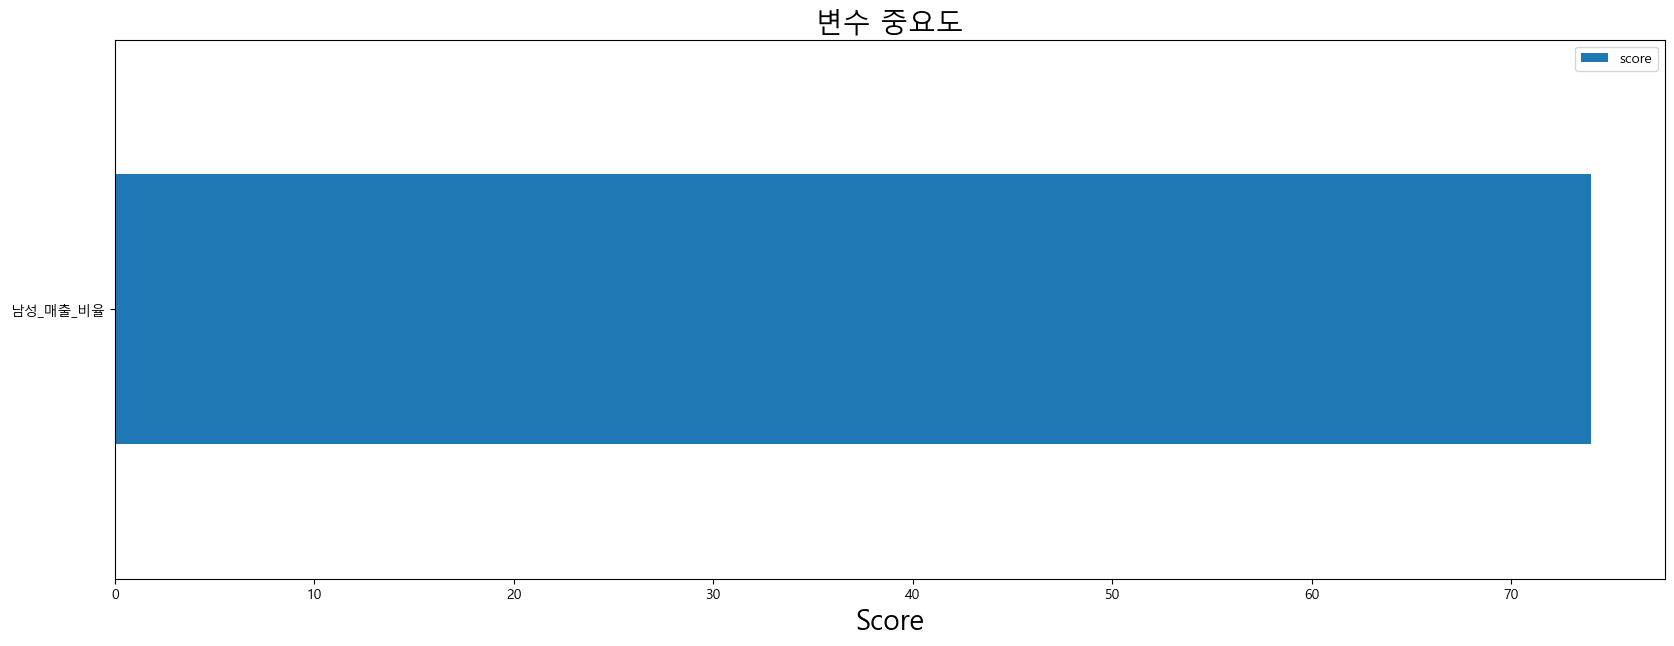

In [24]:
feature_importance(model_survive_1)

#### b. 연령대별 매출

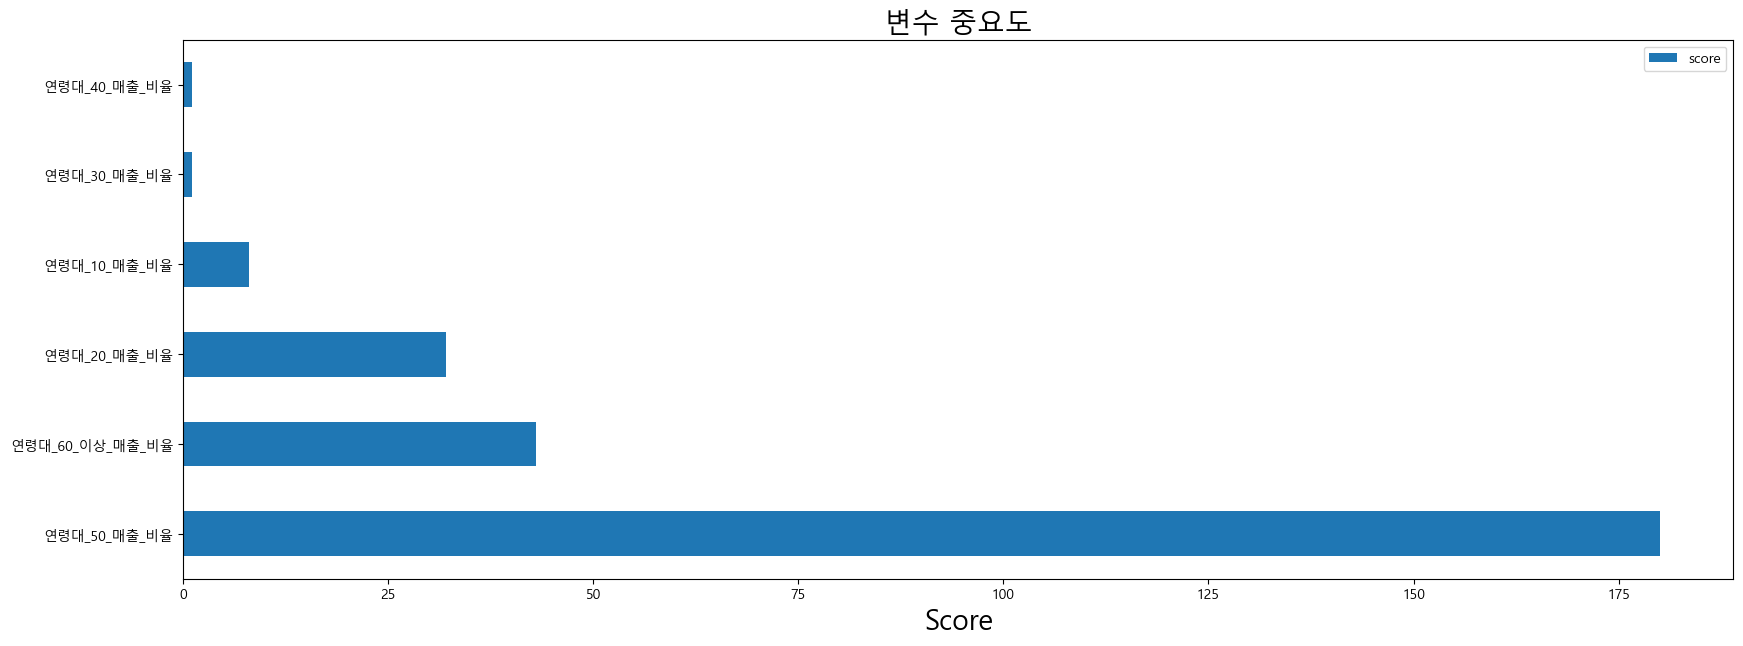

In [25]:
feature_importance(model_survive_2)

#### c. 요일별 매출

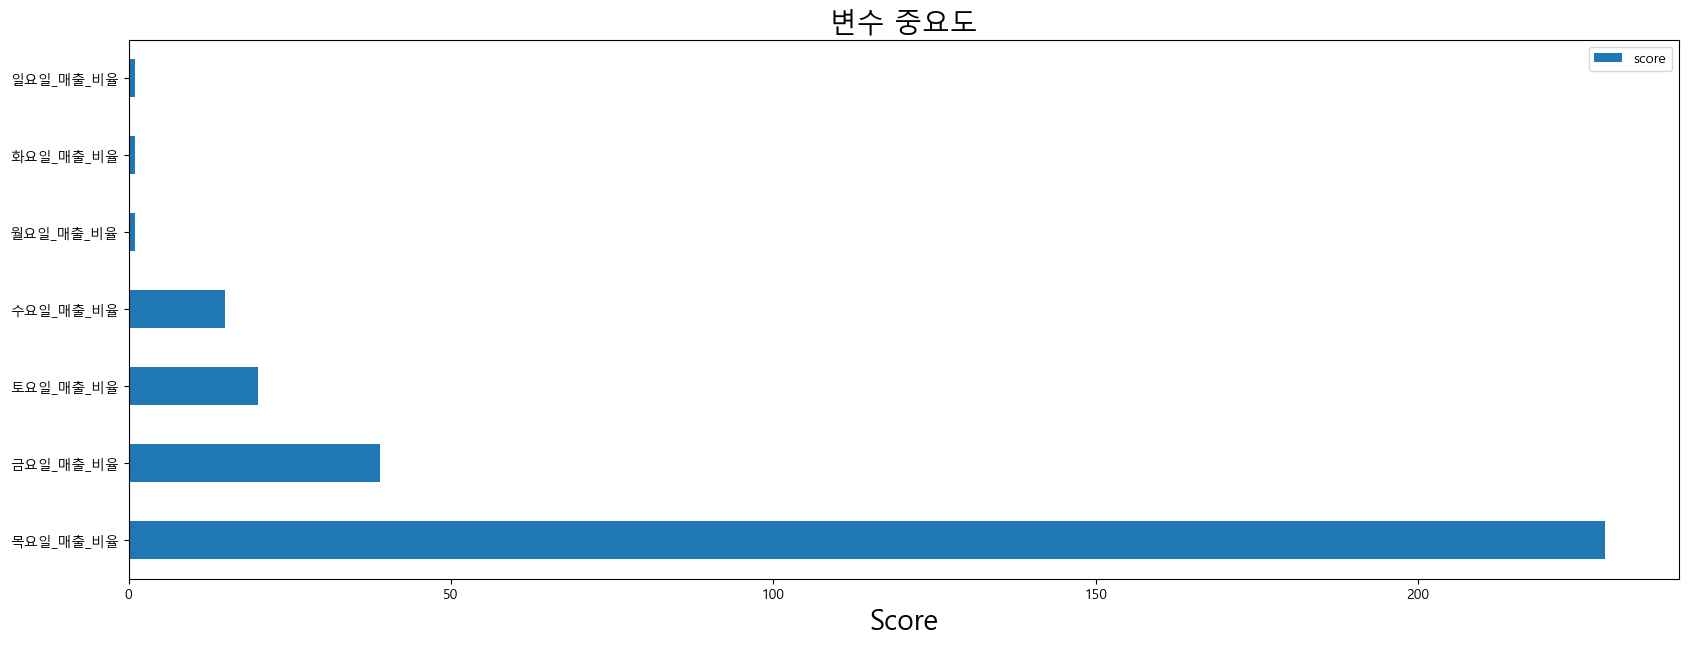

In [26]:
feature_importance(model_survive_3)

#### d. 시간대별 매출

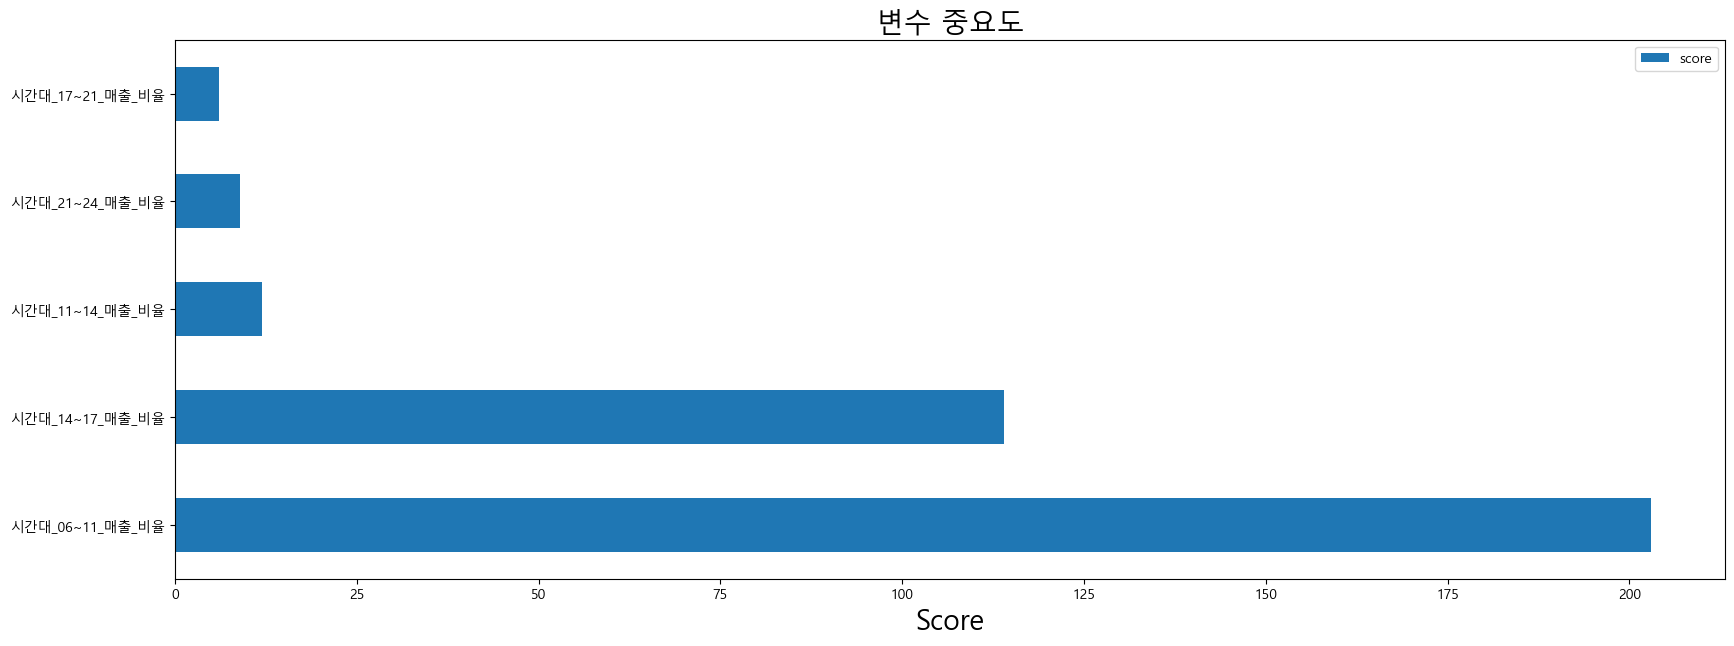

In [27]:
feature_importance(model_survive_4)